In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [ ]:
def randomForest(data,colN):
    print(data)
    y=data["class"]
    listDrop=['class']
    X=data.drop(listDrop,axis="columns")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    nEst=[]
    for i in range(1,200,3):
        nEst.append(i)
    acc=[]
    oob_error=[]
    for i in nEst:
        clf_p=RandomForestClassifier(n_estimators=i,warm_start=True,oob_score=True,random_state=1)
        clf_p.fit(X_train,y_train)
        y_pred_p=clf_p.predict(X_test)
        score=accuracy_score(y_test,y_pred_p)
        acc.append(score)
        oob_error.append(1-clf_p.oob_score_)
        print ("n trees ",i," acc ",score)
    plt.figure(1)
    plt.plot(nEst,oob_error)
    plt.xlabel("number of trees")
    plt.ylabel("oob")
    plt.legend()
    index_max = max(range(len(acc)), key=acc.__getitem__)
    print(nEst[index_max])
    plt.figure(2)
    #clf_p=RandomForestClassifier(n_estimators=25,warm_start=True,oob_score=True,random_state=1)
    #clf_p.fit(X_train,y_train)
    plotFeature(clf_p,colN)

In [ ]:
def plotFeature(model,colN):
    for feature in zip(colN, model.feature_importances_):
        print (feature)
    sortedIdx=model.feature_importances_.argsort()
    print(sortedIdx)
    print(model.feature_importances_)
    colN=np.array(colN)
    plt.barh(colN[sortedIdx], model.feature_importances_[sortedIdx])

In [ ]:
def load():
    #for imputting only the attributes values
    """colNames=['id', 'clump_thickness','unif_cell_size','unif_cell_shape', 'marg_adhesion', 'single_epith_cell_size',
                                                       'bare_nuclei', 'bland_chromatin', 'normal_nucleoli','mitoses','class']
    data=pd.read_csv("breast-cancer-wisconsin.data",names=colNames)
    colN=['clump_thickness','unif_cell_size','unif_cell_shape', 'marg_adhesion', 'single_epith_cell_size',
                                                       'bare_nuclei', 'bland_chromatin', 'normal_nucleoli','mitoses']
    
    y=data["class"]
    data=data.drop(["id","class"],axis="columns")
    data.replace('?',np.nan,inplace=True)
    imp=SimpleImputer(missing_values=np.NaN,strategy='mean')
    data=pd.DataFrame(imp.fit_transform(data[colN]),columns=data.columns)
    data["class"]=y
    print(data)
    data.to_csv("breastCancerImp.csv",index=False)"""
    
    colN=['clump_thickness','unif_cell_size','unif_cell_shape', 'marg_adhesion', 'single_epith_cell_size',
                                                       'bare_nuclei', 'bland_chromatin', 'normal_nucleoli','mitoses']
    
    data=pd.read_csv("breastCancerImp.csv")
    
    randomForest(data,colN)

In [ ]:
def main():
    load()

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving breastCancerImp.csv to breastCancerImp.csv


     clump_thickness  unif_cell_size  ...  mitoses  class
0                5.0             1.0  ...      1.0      2
1                5.0             4.0  ...      1.0      2
2                3.0             1.0  ...      1.0      2
3                6.0             8.0  ...      1.0      2
4                4.0             1.0  ...      1.0      2
..               ...             ...  ...      ...    ...
694              3.0             1.0  ...      1.0      2
695              2.0             1.0  ...      1.0      2
696              5.0            10.0  ...      2.0      4
697              4.0             8.0  ...      1.0      4
698              4.0             8.0  ...      1.0      4

[699 rows x 10 columns]
n trees  1  acc  0.9333333333333333
n trees  4  acc  0.9142857142857143
n trees  7  acc  0.9571428571428572
n trees  10  acc  0.9619047619047619
n trees  13  acc  0.9666666666666667
n trees  16  acc  0.9714285714285714
n trees  19  acc  0.9714285714285714


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

n trees  22  acc  0.9714285714285714
n trees  25  acc  0.9809523809523809
n trees  28  acc  0.9761904761904762
n trees  31  acc  0.9761904761904762
n trees  34  acc  0.9666666666666667
n trees  37  acc  0.9714285714285714
n trees  40  acc  0.9714285714285714
n trees  43  acc  0.9761904761904762
n trees  46  acc  0.9714285714285714
n trees  49  acc  0.9714285714285714
n trees  52  acc  0.9714285714285714
n trees  55  acc  0.9714285714285714
n trees  58  acc  0.9714285714285714
n trees  61  acc  0.9714285714285714
n trees  64  acc  0.9761904761904762
n trees  67  acc  0.9761904761904762
n trees  70  acc  0.9809523809523809
n trees  73  acc  0.9809523809523809
n trees  76  acc  0.9809523809523809
n trees  79  acc  0.9809523809523809
n trees  82  acc  0.9809523809523809
n trees  85  acc  0.9809523809523809
n trees  88  acc  0.9809523809523809
n trees  91  acc  0.9809523809523809
n trees  94  acc  0.9761904761904762
n trees  97  acc  0.9809523809523809
n trees  100  acc  0.9714285714285714


No handles with labels found to put in legend.


n trees  199  acc  0.9761904761904762
25
('clump_thickness', 0.04627461778692972)
('unif_cell_size', 0.2529443267029116)
('unif_cell_shape', 0.22809358000892824)
('marg_adhesion', 0.021670360928857182)
('single_epith_cell_size', 0.0636177276240093)
('bare_nuclei', 0.16121560727735174)
('bland_chromatin', 0.12058087219738203)
('normal_nucleoli', 0.096166441714793)
('mitoses', 0.009436465758837238)
[8 3 0 4 7 6 5 2 1]
[0.04627462 0.25294433 0.22809358 0.02167036 0.06361773 0.16121561
 0.12058087 0.09616644 0.00943647]


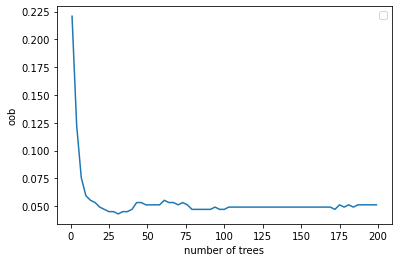

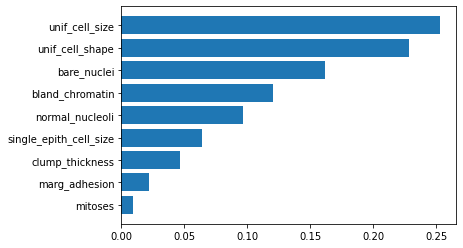

In [ ]:
if __name__=="__main__":
  main()